## Dependencies

In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [2]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

C:\Users\saswa\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

### Keras Specific Dependencies

In [4]:
# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
# from keras.datasets import mnist
from mnist import MNIST
import struct as st
import numpy as np

Using TensorFlow backend.


## Loading and Preprocessing our Data

### Load the MNIST Handwriting Dataset from Keras

In [5]:
from mnist import MNIST
import numpy as np

# Read all EMNIST test and train data
mndata = MNIST('data')
X_train, y_train = mndata.load('C:/Users/saswa/OneDrive/Desktop/Project3/emnist-byclass-train-images-idx3-ubyte', 
                               'C:/Users/saswa/OneDrive/Desktop/Project3/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('C:/Users/saswa/OneDrive/Desktop/Project3/emnist-byclass-test-images-idx3-ubyte', 
                             'C:/Users/saswa/OneDrive/Desktop/Project3/emnist-byclass-test-labels-idx1-ubyte')
# Read mapping of the labels and convert ASCII values to chars
mapping = []
with open('C:/Users/saswa/OneDrive/Desktop/Project3/emnist-byclass-mapping.txt') as f:
    for line in f:
        mapping.append(chr(int(line.split()[1])))

# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255
y_train = np.array(y_train)
X_test = np.array(X_test) / 255
y_test = np.array(y_test)

In [6]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (697932, 784)
Training Data Labels Shape: (697932,)


### Plot the first digit

data  30  :  53


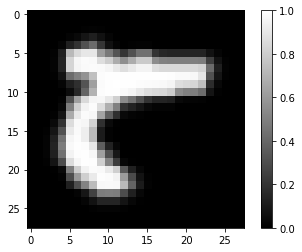

In [7]:
# Print the i data 
i = 30
plt.imshow(X_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean accuracy: ', cv_scores.mean())
print('      Std dev: ', cv_scores.std())

In [8]:
# Scale from 0 to 255
X_train /= 255
X_test /= 255

print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (697932, 784)
X_test shape: (116323, 784)
697932 train samples
116323 test samples


In [10]:
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import TensorBoard   #Visualize the performance of tensorflow training session
from keras import backend

# We need to convert our target labels (expected values) to categorical data
y_train = keras.utils.to_categorical(y_train, 62)
y_test = keras.utils.to_categorical(y_test, 62)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0], 'test samples')

697932 train samples
116323 test samples


In [14]:
# Building our Model¶
# In this example, we are going to build a Deep Multi-Layer Perceptron model with 2 hidden layers.

# Create an empty sequential model
model = Sequential()

In [15]:

# Next, we add our first hidden layer¶
# In the first hidden layer, we must also specify the dimension of our input layer. This will simply be the number of elements (pixels) in each image.
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [16]:
# Add a second hidden layer
model.add(Dense(100, activation='relu'))

In [17]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(62, activation='softmax'))

In [18]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [19]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 62)                6262      
Total params: 94,862
Trainable params: 94,862
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [30]:
# Fit (train) the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
    validation_split=0.1
)

Epoch 1/10
 - 66s - loss: 0.5086 - acc: 0.8274
Epoch 2/10
 - 63s - loss: 0.5029 - acc: 0.8290
Epoch 3/10
 - 63s - loss: 0.4980 - acc: 0.8302
Epoch 4/10
 - 61s - loss: 0.4933 - acc: 0.8311
Epoch 5/10
 - 62s - loss: 0.4896 - acc: 0.8323
Epoch 6/10
 - 66s - loss: 0.4861 - acc: 0.8331
Epoch 7/10
 - 65s - loss: 0.4830 - acc: 0.8338
Epoch 8/10
 - 65s - loss: 0.4803 - acc: 0.8345
Epoch 9/10
 - 67s - loss: 0.4777 - acc: 0.8353
Epoch 10/10
 - 65s - loss: 0.4751 - acc: 0.8359


In [31]:
# Save the model
model.save("mnist_trained20.h5")

In [32]:
# Save the model
model.save("mnist_trained20.h5")

In [33]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5000722915359199, Accuracy: 0.8280821505635171


In [34]:
# Grab just one data point to test with
test = np.expand_dims(X_train[0], axis=0)
test.shape

(1, 784)

KeyError: 'val_acc'

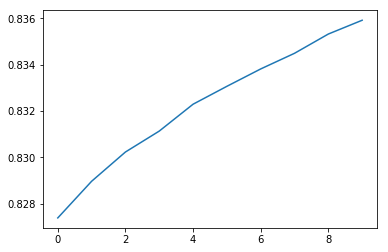

In [35]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

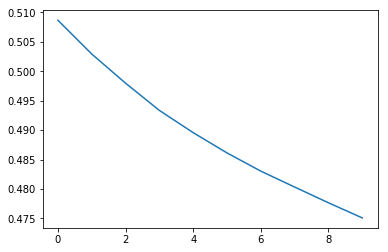

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5000722915359199, Accuracy: 0.8280821505635171


In [38]:
## Making Predictions
#We can use our trained model to make predictions using `mnist_trained20`
# Grab just one data point to test with
test = np.expand_dims(X_train[0], axis=0)
test.shape

(1, 784)

data  30  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


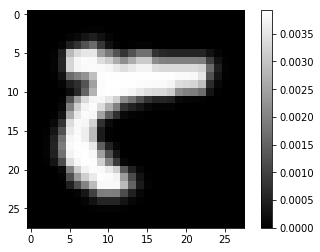

In [44]:
i = 30
plt.imshow(X_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

# Plot the first image from the dataset
# plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [45]:
# Make a prediction. The result should be 0000010000000 for a 5
model.predict(test).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [46]:
# Grab just one data point to test with
test = np.expand_dims(X_train[2], axis=0)
test.shape

(1, 784)

In [ ]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [47]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted class: [6]


In [52]:
# Import a Custom Image
filepath = 'C:/Users/saswa/OneDrive/Desktop/Project3/letterA2.png'

In [53]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

C:\Users\saswa\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [54]:
# Convert the image to a numpy array 
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [55]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

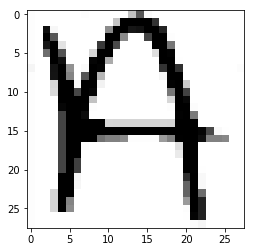

In [56]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

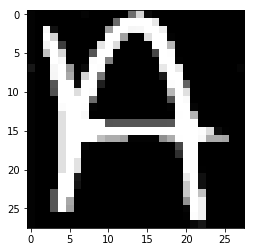

In [57]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [58]:
# Make predictions
model.predict_classes(img)

array([13], dtype=int64)